In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [16]:
d21 = pd.read_csv('./fully_correlated_data/data_21.csv')
d22 = pd.read_csv('./fully_correlated_data/data_22.csv')
d10 = pd.read_csv('./fully_correlated_data/data_10.csv')
d11 = pd.read_csv('./fully_correlated_data/data_11.csv')
d12 = pd.read_csv('./fully_correlated_data/data_12.csv')
d13 = pd.read_csv('./fully_correlated_data/data_13.csv')
d14 = pd.read_csv('./fully_correlated_data/data_14.csv')
d15 = pd.read_csv('./fully_correlated_data/data_15.csv')
d16 = pd.read_csv('./fully_correlated_data/data_16.csv')
d17 = pd.read_csv('./fully_correlated_data/data_17.csv')

In [21]:
comb_data = pd.concat([d10,d11,d12,d13,d14,d15,d16,d17,d21,d22], ignore_index = True)

In [24]:
comb_filt = comb_data.dropna()

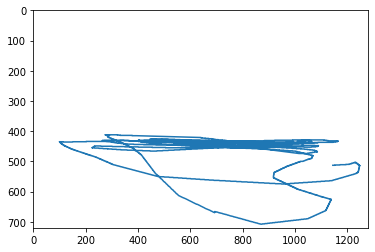

In [26]:
plt.xlim(left=0,right=1280)
plt.ylim(top=0,bottom=720)
plt.plot(comb_data.x_cent,comb_data.y_cent)

In [27]:
RH_Point = np.array([-117.2244901, 32.6990683])
CAM = np.array([-117.2344652, 32.7029769])
RHS = (RH_Point-CAM)/np.linalg.norm(RH_Point-CAM)

In [28]:
RHS_Ang = np.arctan2(RHS[1],RHS[0])

In [37]:
comb_data.head()

,Frame No.,UTC Timestamp,Lat,Long,estimated_time,time,gps_lat,gps_lon,gps_lat_rel,gps_lon_rel,x,y,width,height,x_cent,y_cent,lat_int,lon_int,angles
0,0,19:48:52,32.70297,-117.234631,19:48:56.0,0.000000,NaN,NaN,NaN,NaN,1069.0,426.00,33.0,12.000,1086.0,438.0,-0.000296,0.001517,-0.192723
1,1,19:48:52,32.70297,-117.234631,19:48:56.06,0.055556,NaN,NaN,NaN,NaN,1068.5,426.01,33.0,11.993,1085.0,438.0,-0.000296,0.001517,-0.192723
2,2,19:48:52,32.70297,-117.234631,19:48:56.11,0.111111,NaN,NaN,NaN,NaN,1068.1,426.03,33.0,11.986,1085.0,438.0,-0.000296,0.001517,-0.192723
3,3,19:48:52,32.70297,-117.234631,19:48:56.17,0.166667,NaN,NaN,NaN,NaN,1067.6,426.04,33.0,11.979,1084.0,438.0,-0.000296,0.001517,-0.192723
4,4,19:48:52,32.70297,-117.234631,19:48:56.22,0.222222,NaN,NaN,NaN,NaN,1067.1,426.06,33.0,11.972,1084.0,438.0,-0.000296,0.001517,-0.192723


In [31]:
angles = np.arctan2(comb_data.lat_int.values,comb_data.lon_int.values)

In [32]:
comb_data['angles'] = angles

In [44]:
comb_data['angle_offset'] = angles - RHS_Ang

In [67]:
min_err = 1e10
best = None
error = []
iis = []
for i in np.arange(1,1.5,.0001):
    agr = (comb_data.angle_offset/i).values
    x_prop = (1-comb_data.x_cent/1280).values
    err = ((x_prop-agr)**2).mean()
    error.append(err)
    iis.append(i)
    if err < min_err:
        min_err = err
        best = i
        
FOV = best

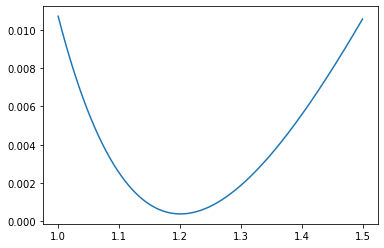

In [68]:
plt.plot(iis,error)

In [70]:
comb_data['angle_rel'] = comb_data.angle_offset/FOV

In [71]:
comb_data

,Frame No.,UTC Timestamp,Lat,Long,estimated_time,time,gps_lat,gps_lon,gps_lat_rel,gps_lon_rel,...,y,width,height,x_cent,y_cent,lat_int,lon_int,angles,angle_offset,angle_rel
0,0,19:48:52,32.70297,-117.234631,19:48:56.0,0.000000,NaN,NaN,NaN,NaN,...,426.00,33.00,12.000,1086.0,438.0,-0.000296,0.001517,-0.192723,0.180726,0.150504
1,1,19:48:52,32.70297,-117.234631,19:48:56.06,0.055556,NaN,NaN,NaN,NaN,...,426.01,33.00,11.993,1085.0,438.0,-0.000296,0.001517,-0.192723,0.180726,0.150504
2,2,19:48:52,32.70297,-117.234631,19:48:56.11,0.111111,NaN,NaN,NaN,NaN,...,426.03,33.00,11.986,1085.0,438.0,-0.000296,0.001517,-0.192723,0.180726,0.150504
3,3,19:48:52,32.70297,-117.234631,19:48:56.17,0.166667,NaN,NaN,NaN,NaN,...,426.04,33.00,11.979,1084.0,438.0,-0.000296,0.001517,-0.192723,0.180726,0.150504
4,4,19:48:52,32.70297,-117.234631,19:48:56.22,0.222222,NaN,NaN,NaN,NaN,...,426.06,33.00,11.972,1084.0,438.0,-0.000296,0.001517,-0.192723,0.180726,0.150504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,3006,19:41:14,32.70297,-117.234631,19:41:15.29,136.396313,NaN,NaN,NaN,NaN,...,471.13,133.38,41.750,1147.0,513.0,-0.000076,0.000330,-0.226596,0.146853,0.122296
34580,3007,19:41:14,32.70297,-117.234631,19:41:15.43,136.539171,32.702901,-117.234301,-0.000076,0.000330,...,471.09,133.03,41.813,1147.0,513.0,-0.000076,0.000330,-0.225368,0.148080,0.123318
34581,3008,19:41:14,32.70297,-117.234631,19:41:15.57,136.682028,NaN,NaN,NaN,NaN,...,471.06,132.69,41.875,1146.0,513.0,-0.000074,0.000331,-0.218860,0.154588,0.128737
34582,3009,19:41:14,32.70297,-117.234631,19:41:15.71,136.824885,NaN,NaN,NaN,NaN,...,471.03,132.34,41.938,1145.0,513.0,-0.000072,0.000332,-0.212360,0.161088,0.134151


In [230]:
a = (full_data_6.angles.values-RHS_Ang) / (np.sin((1280-full_data_6.x.values)/1280)*np.pi)

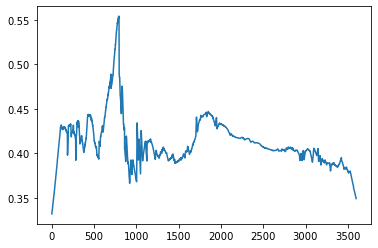

In [231]:
plt.plot(a)

In [236]:
rel_ang = full_data_6.angles.values-RHS_Ang

In [237]:
pred_ang = np.mean(a)*np.sin((1280-data.x.values)/1280*np.pi)

In [239]:
((rel_ang-pred_ang)**2).mean()

0.08149611326351744

In [96]:
np.mean(a)*180/np.pi

71.56739645393593

In [93]:
1.2*180/np.pi

68.75493541569878

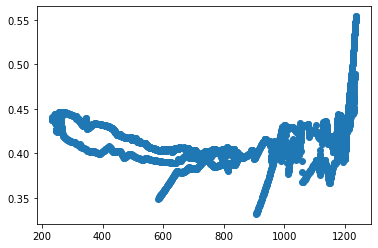

In [226]:
plt.scatter(full_data_6.x.values,a)

In [79]:
1280-643

637

In [87]:
1280/637

2.009419152276295

In [88]:
COV = np.array([-117.2192825,32.7060566])
np.arccos(np.dot(RH_Point-CAM,COV-CAM)/np.linalg.norm(COV-CAM)/np.linalg.norm(RH_Point-CAM))*180/np.pi*2.009419152276295

66.03649611554884

In [104]:
full_data_6[['x','y']]/np.array([1280,720])

,x,y
0,0.708984,0.623611
1,0.709605,0.623518
2,0.710160,0.623410
3,0.711352,0.623406
4,0.711958,0.623357
...,...,...
3595,0.458686,0.630588
3596,0.458121,0.630517
3597,0.457580,0.630424
3598,0.457075,0.630458


In [206]:
model = keras.models.Sequential([
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(16, activation = 'linear'),
    keras.layers.Dense(2, activation = 'linear')
])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
)


In [207]:
maxes = np.array([max(full_data_6.lon_lin),max(full_data_6.lat_lin)])

In [212]:
model.fit((full_data_6[['x','y']].values/np.array([1280,720]))[:3000],full_data_6[['R','angles']].values[:3000],#/maxes,
          validation_data =(full_data_6[['x','y']].values[3000:]/np.array([1280,720]),full_data_6[['R','angles']].values[3000:]),#/maxes), 
         batch_size = 8,
         epochs = 50,
         verbose = 1)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 4.3255e-04 - val_mean_squared_error: 4.3255e-04
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 1.2359e-04 - mean_squared_error: 1.2359e-04 - val_loss: 4.2599e-04 - val_mean_squared_error: 4.2599e-04
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 1.2431e-04 - mean_squared_error: 1.2431e-04 - val_loss: 4.1176e-04 - val_mean_squared_error: 4.1176e-04
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 1.2078e-04 - mean_squared_error: 1.2078e-04 - val_loss: 3.6795e-04 - val_mean_squared_error: 3.6795e-04
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 1.2858e-04 - mean_squared_error: 1.2858e-04 - val_loss: 4.2737e-04 - val_mean_squared_error: 4.2737e-04
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 1.3309e-04 - mean_squared_error: 1.3309e-04 

Epoch 47/50
375/375 [==============================] - 1s 2ms/step - loss: 1.4276e-04 - mean_squared_error: 1.4276e-04 - val_loss: 5.4665e-04 - val_mean_squared_error: 5.4665e-04
Epoch 48/50
375/375 [==============================] - 1s 2ms/step - loss: 1.3209e-04 - mean_squared_error: 1.3209e-04 - val_loss: 2.7948e-04 - val_mean_squared_error: 2.7948e-04
Epoch 49/50
375/375 [==============================] - 1s 2ms/step - loss: 1.3109e-04 - mean_squared_error: 1.3109e-04 - val_loss: 4.0475e-04 - val_mean_squared_error: 4.0475e-04
Epoch 50/50
375/375 [==============================] - 1s 2ms/step - loss: 1.3341e-04 - mean_squared_error: 1.3341e-04 - val_loss: 6.9234e-04 - val_mean_squared_error: 6.9234e-04


In [213]:
pred = model.predict(full_data_6[['x','y']].values[:]/np.array([1280,720]))

In [218]:
data = full_data_6

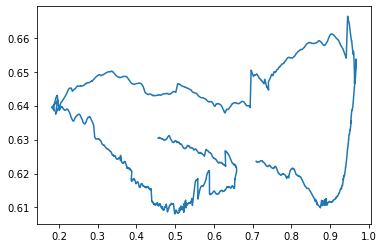

In [223]:
plt.plot(data.x/1280,data.y/720)

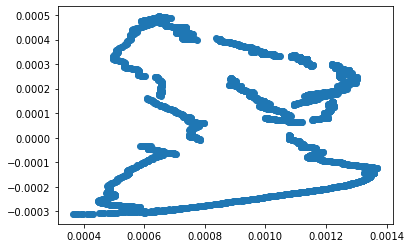

In [211]:
plt.scatter(pred[:,0]*maxes[0],pred[:,1]*maxes[1])

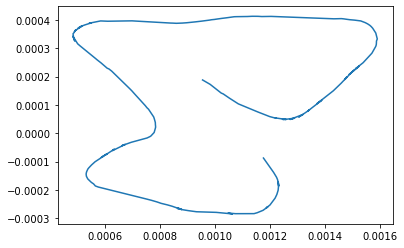

In [184]:
plt.plot(full_data_6.lon_lin.values[:],full_data_6.lat_lin.values[:])